In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))

In [5]:
unique_values = df['month'].unique()
unique_values.sort()

In [6]:
groupDf = df[['user_id', 'Toxicity','qt_flag', 'rt_flag','month']]

In [7]:
groupDf['Toxicity'] = groupDf['Toxicity'] * 10
groupDf['Toxicity'] = (groupDf['Toxicity'].apply(np.ceil)) / 10

In [8]:
groupDf = groupDf[groupDf['Toxicity'] != 0.0]

In [9]:
def categorize_tweets(group):
    if (group['qt_flag'] == False).all() and (group['rt_flag'] == False).all():
        return 'o'
    elif (group['qt_flag'] == False).all() and (group['rt_flag'] == True).all():
        return 'r'
    elif (group['qt_flag'] == True).all() and (group['rt_flag'] == False).all():
        return 'q'
    elif ((group['qt_flag'] == False) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_r'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == False)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_q'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'q_r'
    else:
        return 'o_q_r'

In [19]:
def pltMonth(monthIn):
  monthDf = groupDf[groupDf['month'] == monthIn]
  userDf = monthDf.groupby('user_id').apply(categorize_tweets)
  userDf = userDf.reset_index()
  userDf = userDf.rename(columns={userDf.columns[1]: "user_category"})
  dict_cat = {}
  # cat_list = ["o", "r", "q", "o_r", "r_q", "o_q", "o_r_q"]
  cat_list = ["o","q","o_q"]
  for i in range(3):
      for j in range(10):
          string_want  = f"{cat_list[i]}_{(j+1)/10}" 
          dict_cat[string_want] = 0
  for index, row in userDf.iterrows():
    cat = userDf['user_category'].iloc[index]
    cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]]
    for j, c_row in cat_user.iterrows():
      t_score = c_row["Toxicity"]
      string_put = f"{cat}_{t_score}"
      dict_cat[string_put] += 1
  x = [i/10 for i in range(1, 11)]
  for cat in cat_list:
      y = [dict_cat[f"{cat}_{tox}"] for tox in x]
      # print(y)
      plt.plot(x, y, label=cat)

  plt.xlabel("Toxicity Score")
  plt.ylabel("Count of Users")
  plt.title(f"Month Number - {monthIn}")
  plt.legend()
  plt.show()
  


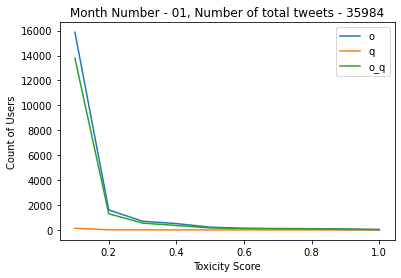

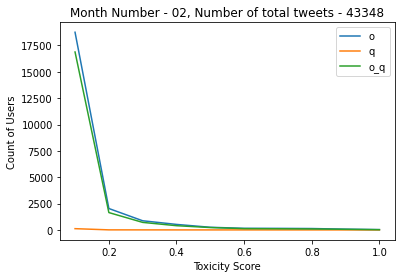

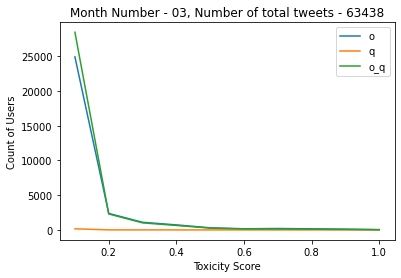

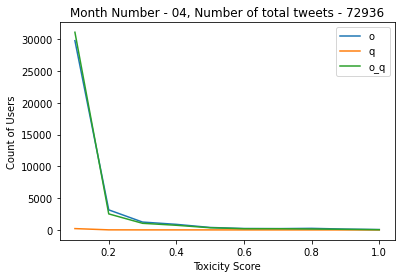

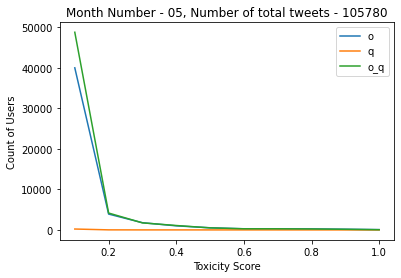

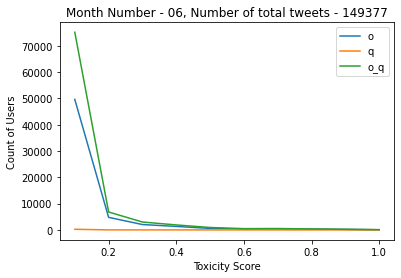

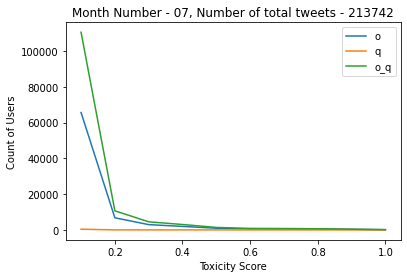

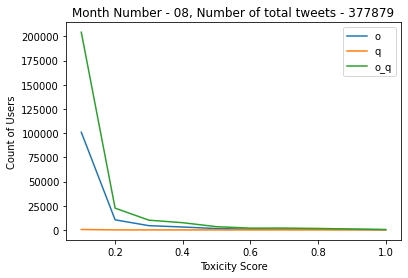

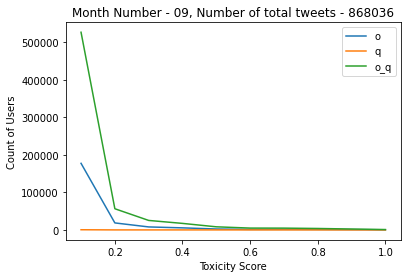

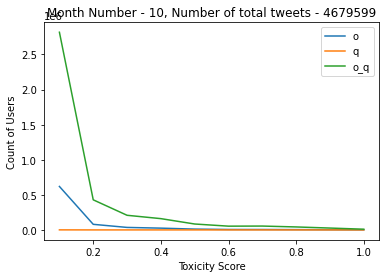

In [13]:
for i in unique_values:
  pltMonth(i)

In [20]:
def pltMonthWithLog(monthIn):
  monthDf = groupDf[groupDf['month'] == monthIn]
  userDf = monthDf.groupby('user_id').apply(categorize_tweets)
  userDf = userDf.reset_index()
  userDf = userDf.rename(columns={userDf.columns[1]: "user_category"})
  dict_cat = {}
  # cat_list = ["o", "r", "q", "o_r", "r_q", "o_q", "o_r_q"]
  cat_list = ["o","q","o_q"]
  for i in range(3):
      for j in range(10):
          string_want  = f"{cat_list[i]}_{(j+1)/10}" 
          dict_cat[string_want] = 0
  for index, row in userDf.iterrows():
    cat = userDf['user_category'].iloc[index]
    cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]]
    for j, c_row in cat_user.iterrows():
      t_score = c_row["Toxicity"]
      string_put = f"{cat}_{t_score}"
      dict_cat[string_put] += 1
  x = [i/10 for i in range(1, 11)]
  for cat in cat_list:
      y = [dict_cat[f"{cat}_{tox}"] for tox in x]
      # print(y)
      plt.semilogy(x, y, label=cat)

  plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())

  plt.xlabel("Toxicity Score")
  plt.ylabel("Count of Users")
  plt.title(f"Month Number - {monthIn}")
  plt.xticks(x)
  plt.legend()
  plt.show()
  

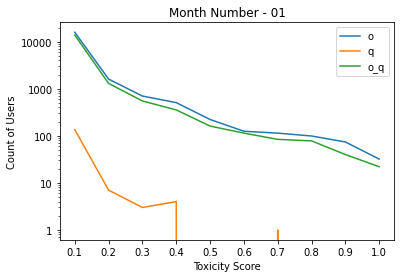

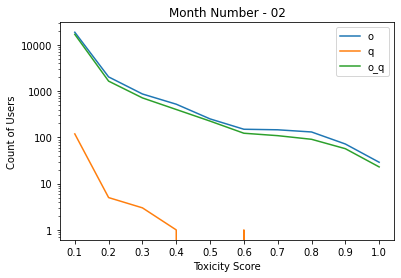

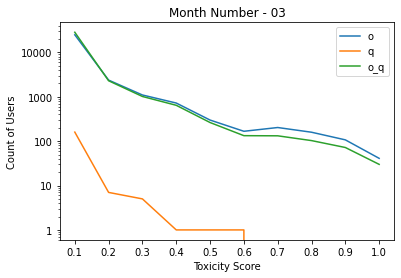

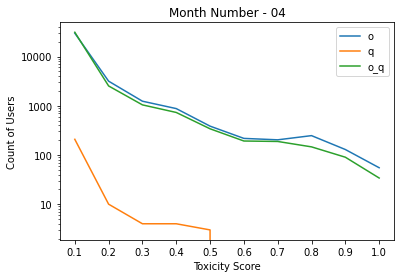

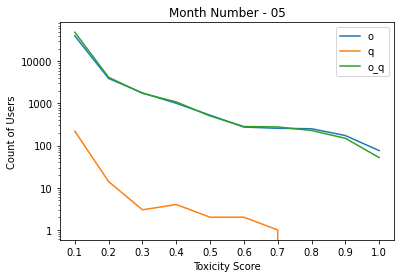

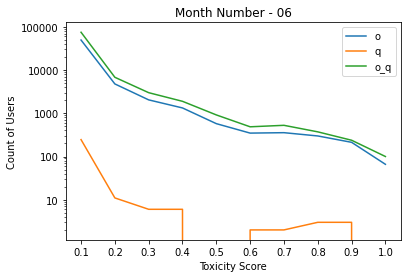

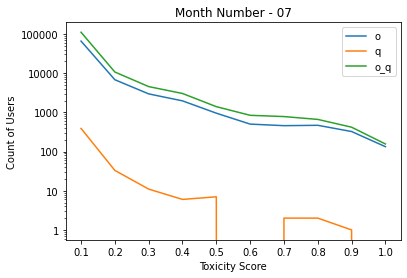

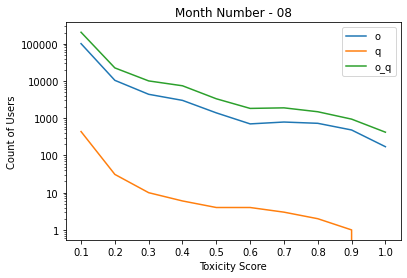

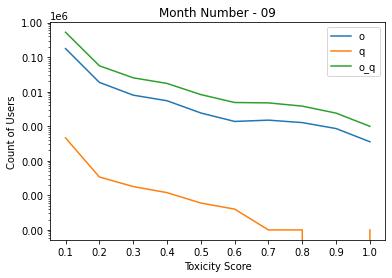

In [ ]:
for i in unique_values:
  pltMonthWithLog(i)